In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch
import multiprocessing as mp
import plotly.express as px
import datashader as ds
import datashader.transfer_functions as tf
import vispy.plot as vp

from scipy.io import wavfile
from scipy.signal import correlate
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from methods import load_file, load_dataframe, plot_signal, cut_signal, plot_cut, corr_f, split_array, mean_corr, parallel_corr_f, find_delta_time
from scipy.signal import hilbert
from scipy.signal import hilbert, find_peaks
from scipy.ndimage import gaussian_filter1d

/Users/alexanderknyshov/Desktop/KLYAZMA_autumn/venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
paths = ['Клязьма 17.09.24 вертикаль/Track1/receivers/TASCAM_0019S1.wav', 'Клязьма 17.09.24 вертикаль/Track1/receivers/TASCAM_0019S2.wav', 'Клязьма 17.09.24 вертикаль/Track1/source/TASCAM_0054S4.wav',
         'Клязьма 17.09.24 вертикаль/Track2/receivers/TASCAM_0020S1.wav', 'Клязьма 17.09.24 вертикаль/Track2/receivers/TASCAM_0020S2.wav', 'Клязьма 17.09.24 вертикаль/Track2/source/TASCAM_0055S4.wav']
names = ['Track 1 Receiver 1', 'Track 2 Receiver 2', 'Track 1 Source',
         'Track 2 Receivser 1', 'Track 2 Receiver 2', 'Track 2 Source']
dct = {'name': [], 'sample_rate': [], 'data': [], 'time': []}

df = load_dataframe(paths=paths, names=names, dct=dct)

In [3]:
df_cut = plot_cut(borders=[2200, 2201], number=3, df=df, plots=False)

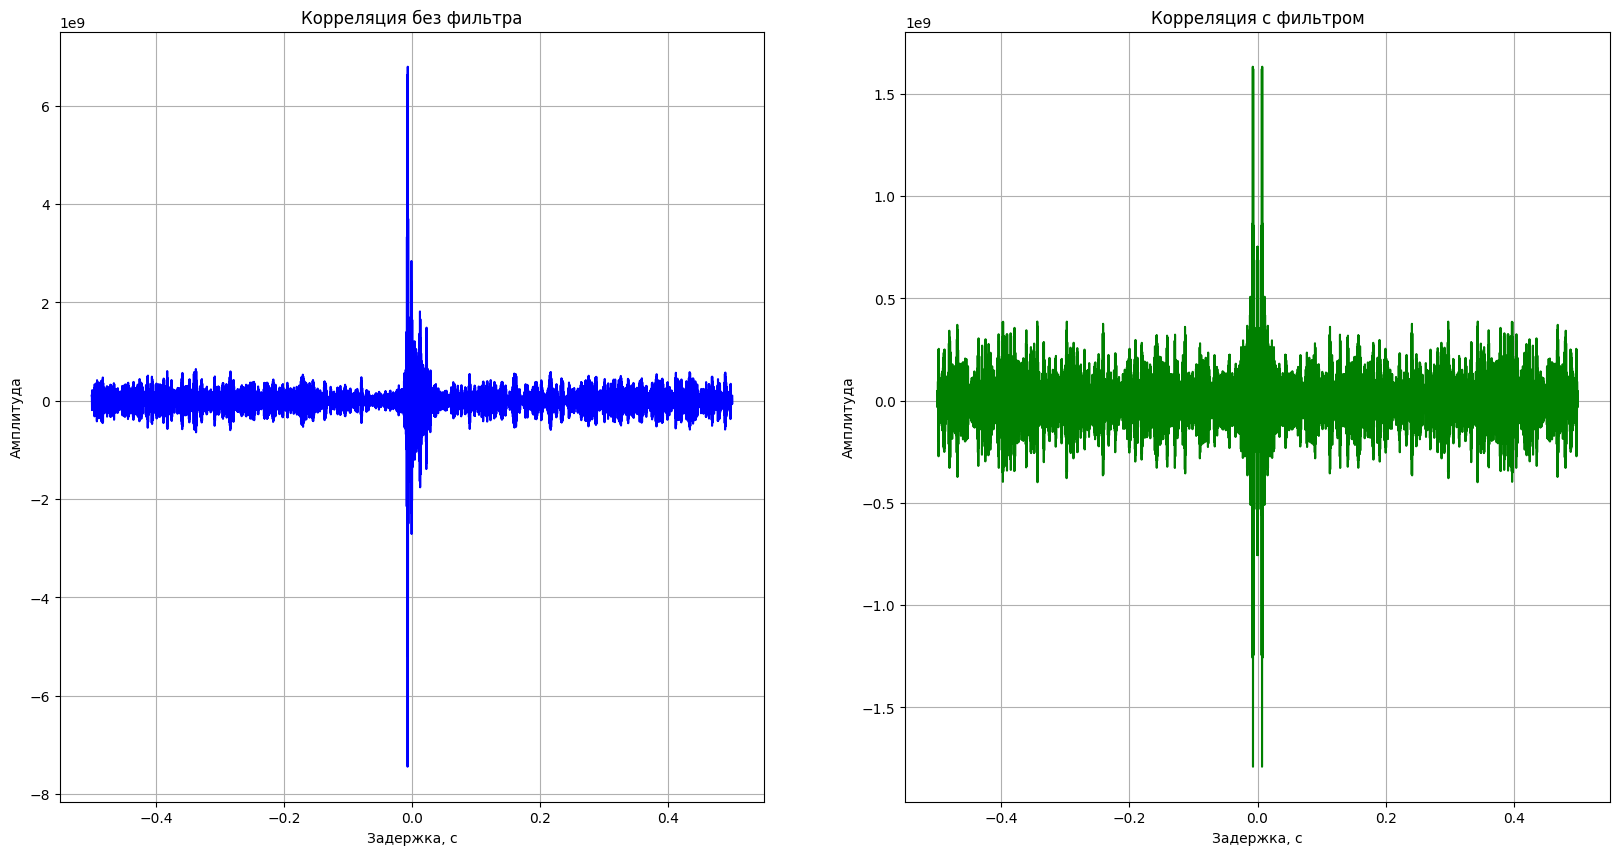

In [24]:
corr_flt, lags_flt = corr_f(df_cut['data'][1], df_cut['data'][2], 44100, filter_freq=2000, do_filter=True)
corr, lags = corr_f(df_cut['data'][1], df_cut['data'][2], 44100, filter_freq=4000, do_filter=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(lags, corr, color='blue')
ax1.set_title("Корреляция без фильтра")
ax1.set_xlabel("Задержка, с")
ax1.set_ylabel("Амплитуда")
ax1.grid(True)

ax2.plot(lags_flt, corr_flt, color='green')
ax2.set_title("Корреляция c фильтром")
ax2.set_xlabel("Задержка, с")
ax2.set_ylabel("Амплитуда")
ax2.grid(True)